<a href="https://colab.research.google.com/github/JoshiGaurav11/SelfLearningMLforChem/blob/main/ML_methods/LinearRegression_Jensen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression


y=mX+b; where m is slope and b is intercept

In ML:
  ypredict=b+wX; where b is bias and w is weight

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for a 3D plot
import pandas as pd
import numpy as np

In [ ]:
data = [(0,1), (1,3), (2,2), (3,5), (4,7), (5,8), (6,8), (8,10), (9,12), (10,14), (12,18)]
df=pd.DataFrame(data, columns=['x','y'])
df

,x,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,8,10
8,9,12
9,10,14


Loss function or Cost function

$L2=1/2<(y-y_predicted)^2>$

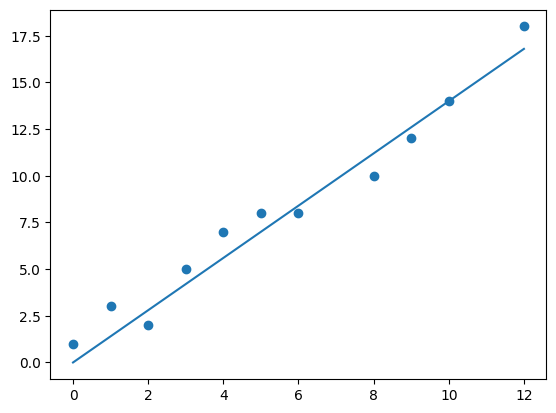

0.5090909090909093

In [ ]:
# a trial to fit the data with manually trying values of b and w
X=df['x']
Y=df['y']
b=0
w=1.4
y_predicted=b+w*X
y_predicted.name='y_predicted'
plt.scatter(X,Y)
plt.plot(X,y_predicted)
plt.show()
#lossfunction
error=(Y-y_predicted)
L2=0.5*np.mean(error**2)
L2

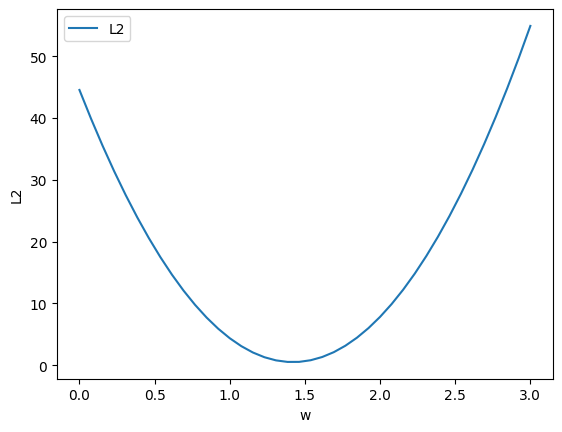

In [ ]:
# Finding the optimal value of weight, i.e. w for b=0
b=0
w_guess=np.linspace(0,3,num=40)
w_list=[]
l2_list=[]
for w in w_guess:
  y_predicted=b+w*X
  y_predicted.name='y_predicted' #renaming the title of y_predicted column, by default it takes 'x' as the heading of the column.
  #loss function
  l2=0.5*(np.mean((Y-y_predicted)**2))
  l2_list.append(l2)
  w_list.append(w)
# Convert lists to NumPy arrays; much faster and easy for numerical operations
w_list = np.array(w_list)
l2_list = np.array(l2_list)
plt.plot(w_list,l2_list)
plt.legend(['L2'])
plt.xlabel('w')
plt.ylabel('L2')
plt.show()



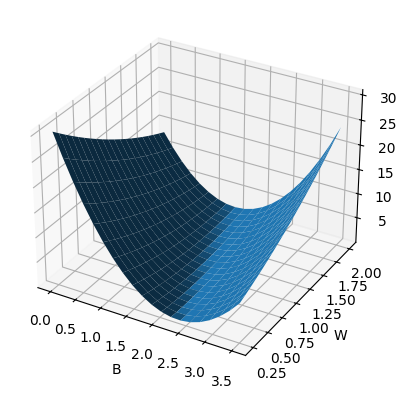

In [ ]:
#Find optimal value for w and b; generating a 3D plot
#b=0
b_guess=np.linspace(0,3.5,num=20) #generates sequence of evenly spread numbers over a specified interval.
w_guess= np.linspace(0.25,2.0,num=20)
b_list=[]
w_list=[]
L2_list=[]
for b in b_guess:
  for w in w_guess:
    y_predicted=b+w*X
    error=(Y-y_predicted)
    L2=0.5*np.mean(error**2)
    #print(b,w,L2)
    b_list.append(b)
    w_list.append(w)
    L2_list.append(L2)
# Convert lists to NumPy arrays
b_list = np.array(b_list)
w_list = np.array(w_list)
L2_list = np.array(L2_list)

# Reshape L2_list to 2D
L2_list = L2_list.reshape(len(b_guess), len(w_guess))

# Create meshgrid for X and Y
B, W = np.meshgrid(b_guess, w_guess)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Use meshgrid for plotting
ax.plot_surface(B, W, L2_list)
ax.set_xlabel('B')
ax.set_ylabel('W')
ax.set_zlabel('L2')

plt.show()

Gradient Descent

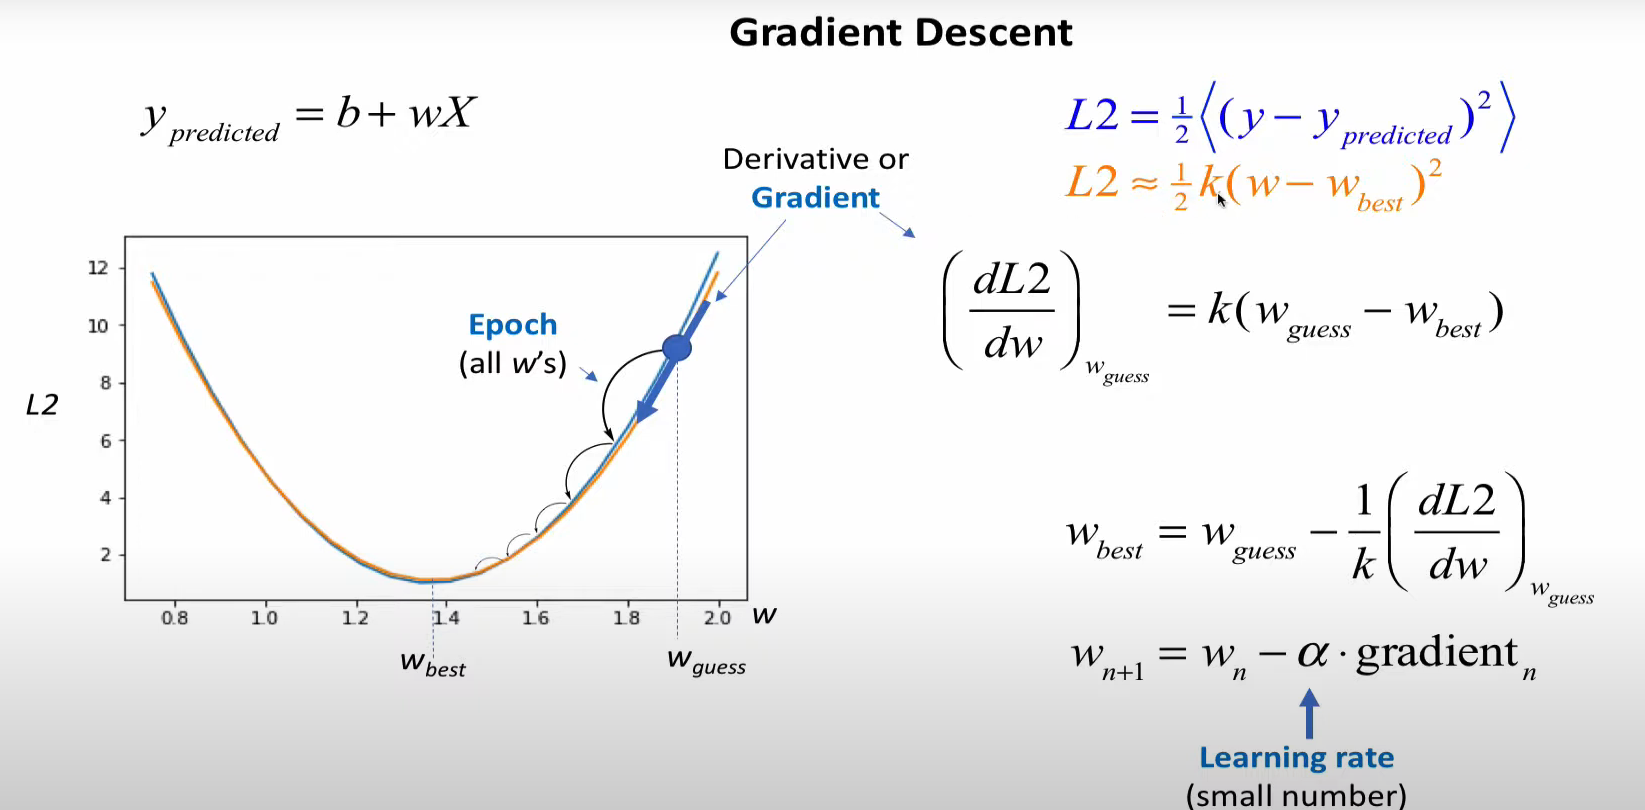



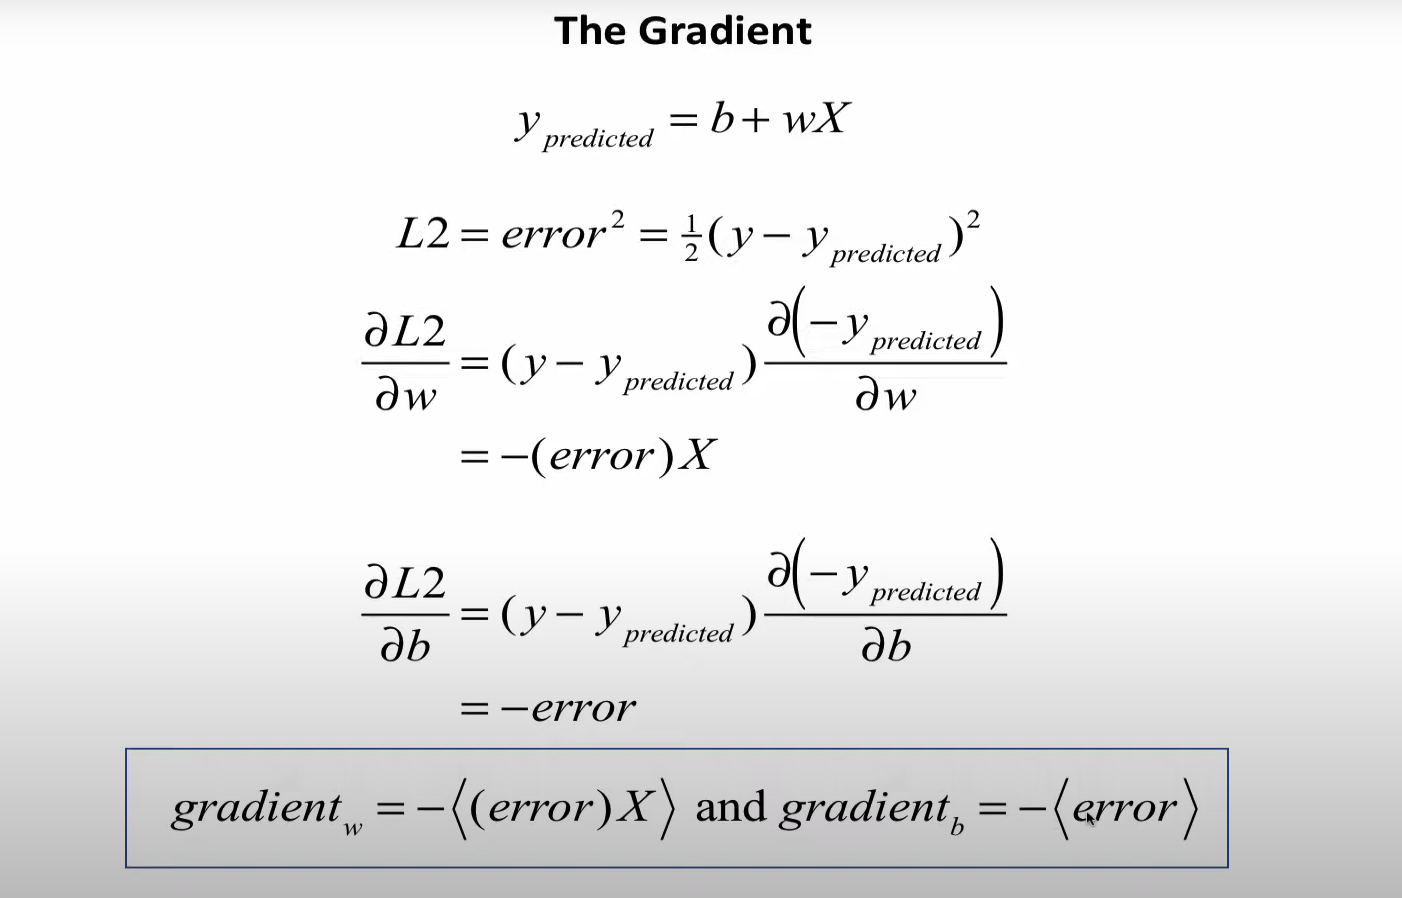




In [ ]:
# Gradient Descent to get the values of w and b corresponding to least l2
b=0
w=2.0
epochs=10000 #steps
learning_rate=0.01
for epoch in range(epochs):
  y_predicted=b+w*X
  y_predicted.name='y_predicted' #renaming the title of y_predicted column, by default it takes 'x' as the heading of the column.
  #loss function
  error=Y-y_predicted
  l2=0.5*(np.mean((error)**2))
  #print(epoch,l2)
  gradient_b=-np.mean(error)
  b=b-learning_rate*gradient_b
  gradient_w=-np.mean((error)*X)
  w=w-learning_rate*gradient_w
  if epoch%(epochs/10)==0:
    print(epoch,l2)
print(b,w)

0 7.818181818181818
1000 0.4016271820898421
2000 0.40140734115603854
3000 0.4014069271879133
4000 0.40140692640839704
5000 0.401406926406929
6000 0.4014069264069265
7000 0.40140692640692666
8000 0.4014069264069264
9000 0.40140692640692666
0.7857142857142647 1.3226190476190505


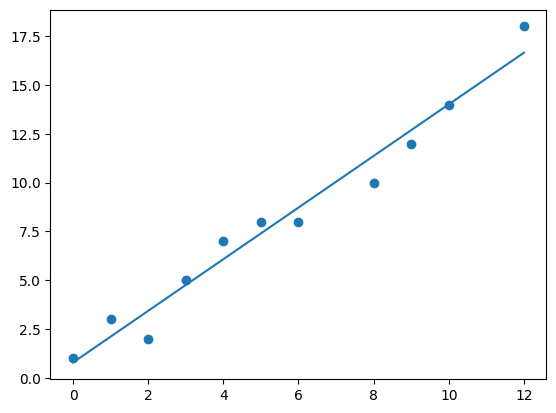

In [ ]:
plt.scatter(X,Y)
plt.plot(X,y_predicted)
plt.show()